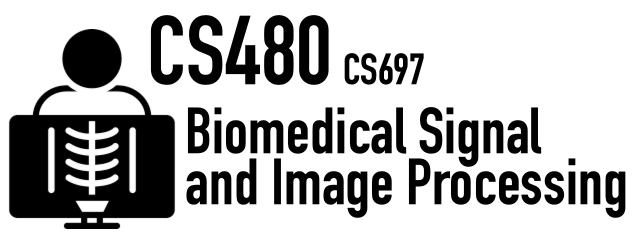
#Assignment 4

In [1]:
# In this assignment, we will create a Random Forest classifier to detect pneumonia!

In [2]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# we are using mahotas again, so lets install it!
!pip install mahotas

     |████████████████████████████████| 5.7MB 11.4MB/s 


In [4]:
# our imports include sklearn this time
import mahotas as mh
import os
from sklearn.ensemble import RandomForestClassifier

**Task 1:** Download, extract, and load the data! [15 Points]

In [5]:
# Please download this file: https://cs480.org/data/xray.zip
# This is a subset of the Kaggle Pneumonia Dataset!
#
# TODO: Upload xray.zip using the file panel on the left.

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
# Run this code to extract the zip file and to create
# the folder structure of normal/ and pneumonia/ images.
# Each folder contains the first images of the Kaggle dataset.
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/xray.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

NORMAL_DIR = './xray/normal/'
PNEUMONIA_DIR = './xray/pneumonia/'
#NORMAL_DIR = '/content/drive/MyDrive/Colab Notebooks/xray/normal/'
#PNEUMONIA_DIR = '/content/drive/MyDrive/Colab Notebooks/xray/pneumonia/'

In [26]:
# Here we load the first image from the normal dataset.
img = mh.imread(NORMAL_DIR + 'IM-0115-0001.jpeg')
#img = mh.imread('/content/drive/MyDrive/Colab Notebooks/xray/normal/IM-0115-0001.jpeg')

In [11]:
# TODO: Please display this image and print the dimensions!


In [ ]:
# TODO: YOUR CODE

In [27]:
img

array([[ 22,  24,  24, ...,  96,  94,  93],
       [ 23,  24,  24, ...,  97,  94,  92],
       [ 24,  24,  23, ...,  99,  96,  94],
       ...,
       [ 49,  50,  48, ..., 119, 119, 119],
       [ 50,  52,  53, ..., 123, 124, 123],
       [ 52,  53,  54, ..., 129, 128, 127]], dtype=uint8)

In [28]:
#dimensions
img.shape

(1858, 2090)

**Task 2:** Let's do some data wrangling and more visualization! [35 Points]

In [29]:
# This code loads all normal images into a numpy array.
normal_files = os.listdir( NORMAL_DIR )

normal_images = np.zeros( (len(normal_files), 300, 300), dtype=np.float32)

for i in range(len(normal_files)):
  loaded_image = mh.imread( NORMAL_DIR + normal_files[i], as_grey=True )

  loaded_image = mh.imresize( loaded_image, (300, 300) )
  img_shape = loaded_image.shape

  normal_images[ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

print(normal_images)

[[[ 4.3000000e+01  4.0000000e+01  4.9000000e+01 ...  3.7000000e+01
    3.3000000e+01  0.0000000e+00]
  [ 4.5000000e+01  3.7000000e+01  4.3000000e+01 ...  2.8000000e+01
    2.5000000e+01  0.0000000e+00]
  [ 4.7000000e+01  3.3000000e+01  4.6000000e+01 ...  2.4000000e+01
    2.3000000e+01  0.0000000e+00]
  ...
  [ 1.9259299e-34  2.7733391e-32  7.4941786e-30 ... -0.0000000e+00
   -0.0000000e+00  0.0000000e+00]
  [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
    0.0000000e+00  0.0000000e+00]
  [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
    0.0000000e+00  0.0000000e+00]]

 [[ 3.8000000e+01  4.1000000e+01  4.8000000e+01 ...  2.2000000e+01
    2.2000000e+01  0.0000000e+00]
  [ 3.8000000e+01  4.2000000e+01  4.3000000e+01 ...  1.9000000e+01
    2.3000000e+01  0.0000000e+00]
  [ 3.8000000e+01  4.2000000e+01  4.5000000e+01 ...  1.7000000e+01
    2.0000000e+01  0.0000000e+00]
  ...
  [ 1.5000000e+01  1.5000000e+01  1.5000000e+01 ...  1.1000000e+01
    1.2000

In [47]:
# This code loads all pneumonia images into a numpy array.
pneumonia_files = os.listdir( PNEUMONIA_DIR )
print(pneumonia_files)
pneumonia_images = np.zeros( (len(pneumonia_files), 300, 300), dtype=np.float32)

for i in range(len(pneumonia_files)):
  loaded_image = mh.imread( PNEUMONIA_DIR + pneumonia_files[i], as_grey=True )
  #print(loaded_image.shape)
  #print(loaded_image)
  loaded_image = mh.imresize( loaded_image, (300, 300) )
  #print(loaded_image)
  img_shape = loaded_image.shape
  #print(loaded_image.shape)
  pneumonia_images[ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image
print(pneumonia_images[0])

['person23_bacteria_95.jpeg', 'person23_bacteria_84.jpeg', 'person24_bacteria_108.jpeg', 'person7_bacteria_29.jpeg', 'person13_bacteria_49.jpeg', 'person23_bacteria_105.jpeg', 'person23_bacteria_97.jpeg', 'person23_bacteria_93.jpeg', 'person16_bacteria_54.jpeg', 'person9_bacteria_41.jpeg', 'person24_bacteria_112.jpeg', 'person16_bacteria_53.jpeg', 'person6_bacteria_22.jpeg', 'person5_bacteria_16.jpeg', 'person23_bacteria_90.jpeg', 'person19_bacteria_58.jpeg', 'person12_bacteria_46.jpeg', 'person23_bacteria_104.jpeg', 'person25_bacteria_114.jpeg', 'person24_bacteria_111.jpeg', 'person16_bacteria_55.jpeg', 'person7_bacteria_25.jpeg', 'person10_bacteria_43.jpeg', 'person3_bacteria_11.jpeg', 'person23_bacteria_107.jpeg', 'person1_bacteria_2.jpeg', 'person8_bacteria_37.jpeg', 'person23_bacteria_78.jpeg', 'person17_bacteria_56.jpeg', 'person22_bacteria_76.jpeg', 'person22_bacteria_74.jpeg', 'person14_bacteria_51.jpeg', 'person22_bacteria_77.jpeg', 'person25_bacteria_116.jpeg', 'person3_bacte

In [ ]:
# The two code blocks above perform 2 data wrangling operations.
# Which ones?
# Hint: The first one might be more obvious but the second one happens in the
# last line of each block.
# TODO: Operation 1) YOUR ANSWER: loading the image and convert it into numpy array of float numbers
# TODO: Operation 2) YOUR ANSWER: then we resize the image or float of numbers array into 300x300. Thus, each image will contain 300 rows and 300 columns float numbers.

In [ ]:
# Now, let's look at the first 5 normal_images and the first 5 pneumonia_images.
# TODO: Please visualize multiple images at once.
# Hint: You can use one of the following answers from StackOverflow for this:
# https://stackoverflow.com/questions/41210823/using-plt-imshow-to-display-multiple-images

In [ ]:
# TODO: YOUR CODE

print 5 pneumonia image


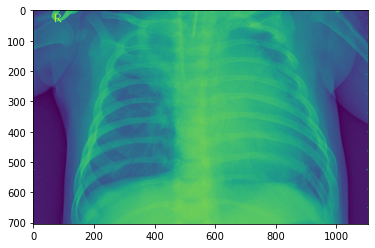

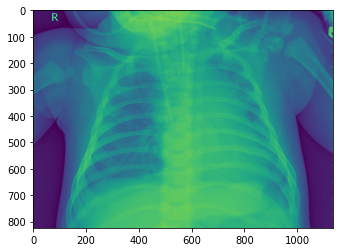

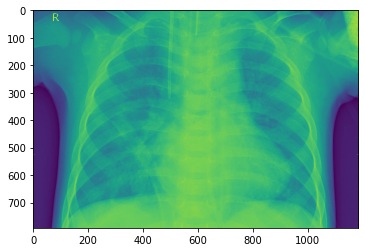

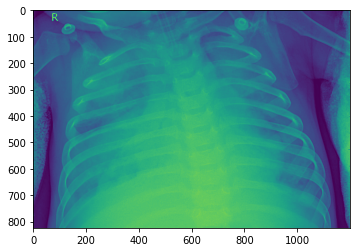

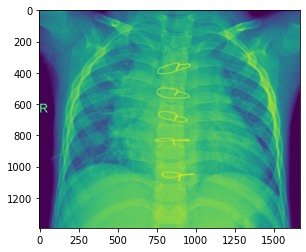

In [48]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def process(filename: str=None) -> None:
    """
    View multiple images stored in files, stacking vertically

    Arguments:
        filename: str - path to filename containing image
    """
    image = mpimg.imread(filename)
    # <something gets done here>
    plt.figure()
    plt.imshow(image)

print('print 5 pneumonia image')
for i in pneumonia_files[0:5]:
  file = PNEUMONIA_DIR + i
  process(file)


print 5 normal image


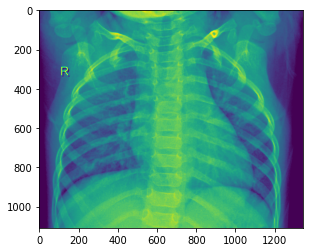

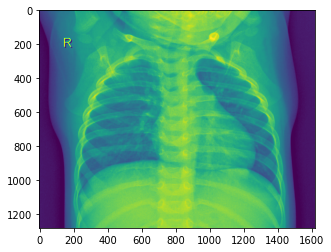

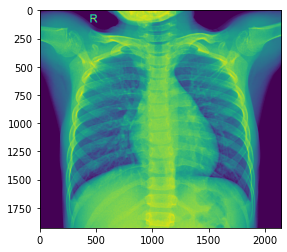

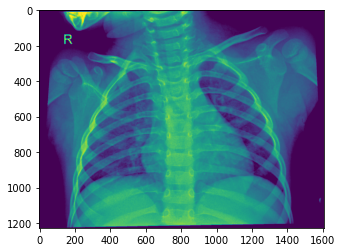

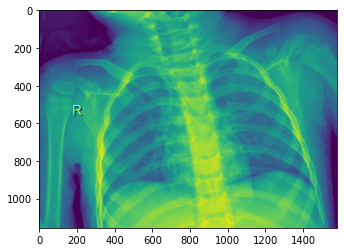

In [49]:
print('print 5 normal image')
#print 5 normal files
for i in normal_files[0:5]:
  file = NORMAL_DIR + i
  process(file)

**Task 3:** Setup training and testing data. [15 Points]

In [50]:
# Any supervised machine learning algorithm requires disjunct sets of
# training and testing data.
#
# For each, we will create a balanced dataset that includes an equal number
# of normal xrays and pneumonia xrays.
#
# The training data will include 120 images (60 normal, 60 pneumonia).
# The testing data will include the remaining 80 images (40 normal, 40 pneumonia).
#
# Supervised learning means that we tell the algorithm which image is normal
# and which image is pneumonia. For this, we need the training_target vector.
# The vector shall be 0 for a normal image, and 1 for a pneumonia.

In [51]:
TRAINING_COUNT = 60

training_data = np.zeros( (TRAINING_COUNT * 2, 300*300 ), dtype=np.float32)
for i, n in enumerate( normal_images[0:TRAINING_COUNT] ):
  training_data[i] = n.ravel() # flatten the image
for i, p in enumerate( pneumonia_images[0:TRAINING_COUNT] ):
  training_data[i + TRAINING_COUNT] = p.ravel()

In [53]:
# TODO: Please create the training_target vector with 0 for a normal image, and
# 1 for a pneumonia.
all_zeros = np.array([0]*60) # TODO
all_ones = np.array([1]*60)

training_target = np.concatenate((all_zeros, all_ones))
print(training_target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]


In [54]:
TESTING_COUNT = 40

testing_data = np.zeros( (TESTING_COUNT * 2, 300*300 ), dtype=np.float32)
for i, n in enumerate( normal_images[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT] ):
  testing_data[i] = n.ravel() # flatten the image
for i, p in enumerate( pneumonia_images[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT] ):
  testing_data[i + TESTING_COUNT] = p.ravel()

In [55]:
# TODO: Please create the testing_target vector with 0 for a normal image, and
# 1 for a pneumonia.
all_zeros = np.array([0]*40) # TODO
all_ones = np.array([1]*40)

testing_target = np.concatenate((all_zeros, all_ones))
print(testing_target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]


**Task 4:** Let's train and evaluate the Random Forest! [35 Points]

In [64]:
# With scikit-learn, we can easily set up a default Random Forest classifier.
clf = RandomForestClassifier()

In [65]:
# Now, we train the classifier with the training data and the training targets.
# We essentially show the classifier an image and tell whether the image is 
# normal or pneumonia.
fitted = clf.fit( training_data, training_target )

In [58]:
fitted

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [59]:
# TODO: In just a few sentences, please explain how the Random Forest works.

In [ ]:
# TODO: YOUR ANSWER

In [63]:
# A random forest is a meta estimator that fits a number of decision tree
# classifiers on various sub-samples of the dataset and uses averaging to
# improve the predictive accuracy and control over-fitting. 
# The following command will return the classification accuracy.
clf.score( testing_data, testing_target )

0.925

In [ ]:
# TODO: Is the classification accuracy good? And, are you surprised?

In [ ]:
# TODO: YOUR ANSWER 92.5% is a convinced number in term of accuracy.

**Bonus:** Let's take a closer look! [33 Points]

In [66]:
# Can you figure out which images were misclassified?
# Hint: You can use predictions = clf.predict(testing_data) for this.
# Can you display them?
# Do you have an idea why these images were problematic?

[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0]
[5, 23, 26]



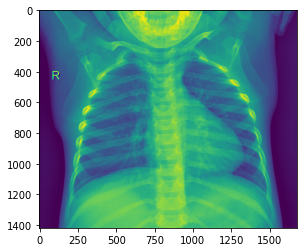

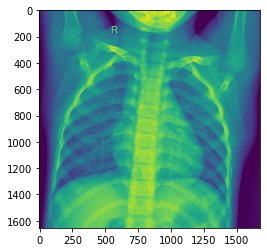

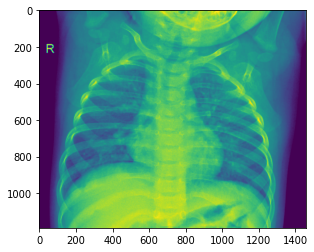

In [69]:
# TODO: YOUR CODE AND YOUR ANSWER
#predict testing data
predictions = clf.predict(testing_data)
print(predictions)
predictions.size

#which ones does not predict well in normal and pneumonia
misclassifies_normal = [];
misclassifies_pneumonia = [];

for i in range(40):
  if predictions[i] != 0:
    misclassifies_normal.append(i)
 #which position of i is misclassified   
print(misclassifies_normal)
print()

# for i in normal_files[0:5]:
#   file = NORMAL_DIR + i
#   process(file)

#display normal images can not classify
for i in range(len(misclassifies_normal)):
  file = NORMAL_DIR + normal_files[misclassifies_normal[i]]
  process(file)


[44, 56, 79]



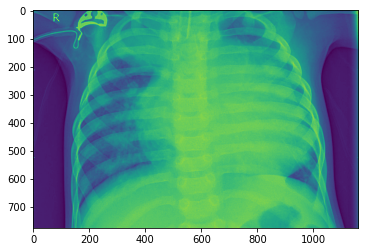

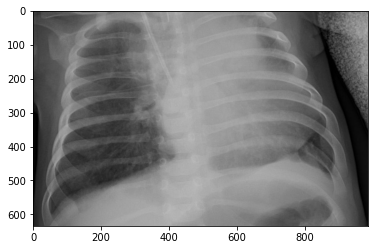

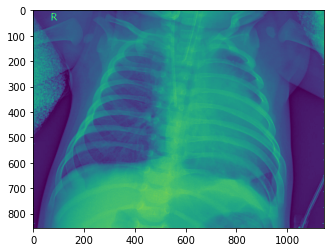

In [70]:
for j in range(40, 80):
  if predictions[j] != 1:
    misclassifies_pneumonia.append(j)
print(misclassifies_pneumonia)
print()
#display pneumonia images can not classify
for i in range(len(misclassifies_pneumonia)):
  file = PNEUMONIA_DIR + pneumonia_files[misclassifies_pneumonia[i]]
  process(file)

In [ ]:
# TODO: How can we improve the classification performance?
# Hint: Ideas without code are fine as well.

In [ ]:
# TODO: YOUR ANSWER
#I think that we have to get more data + images from different patients with different strutures of normal and pneumonia behaviors
# Visualization and make some comparisons between those images,
#and we can detect accurately in the future

In [ ]:
# Great job!!!
#           ___
#       _.-'   \
#      /        \
#     /          \
#    /            `.___
#   ( .--.)\/(,.--.    `-.
#   ,',-. \   / ,-.`.     )
#  ( /   \     /   \ )   / \
#   || .-|     |-. ||---'|  \
#  _|| | |     | | ||_   |   \
# /. \ |_|.---.|_| / ,\  | .^.\
# `.\ `--"     "--' /,'  |/
#   `>  _________ <'
# ,-' ,---.---.---. `-.
# `--'\    \j/    /`--'
#    `.\         /,'
#      \\_______//
#       `-------'       hjw